# 네이버 블로그 포스팅 주제 분류


네이버 블로그에서는 블로그 주제와 각 포스팅의 주제를 설정할 수 있으나, 이는 블로거가 직접 선택하는 것이기 때문에 실제 주제와 명목상 주제가 다른 경우가 있다. 또한, 여러 주제가 섞여 있는 경우는 블로거 자신도 블로그의 성향과 주제를 알지 못할 때가 있다.

네이버 블로그는 항상 전문성이 있을 수록 좋다. 최근 모집 중인 네이버 인플루언서(또는 이전의 파워블로거)는 전문성이 있어야만 지원할 수 있으며, 포스팅 품질 결정 및 노출 순위 등 여러 부분에서 블로거 전문성이 영향을 미치기 때문이다. 광고주 같은 경우에도 블로그의 주제가 일관된 전문 블로거에게 상품을 제공하는 것이 좋으며, 블로거의 전문성 및 전문 주제를 빠르게 파악할 수 있게 하기 위해 다음과 같은 프로젝트를 진행하게 되었다.

----



# Data Crawling



In [524]:
import re
import csv
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import Counter
from konlpy.tag import Okt

okt=Okt()

In [11]:
#내 블로그 크롤링

f = open("plusotherblog1.csv", "a")
f.write('id'+','+'title'+ ',' + 'contents' + ',' + 'keyword' +'\n')

for i in range (1,180):
    url= "http://blog.naver.com/PostList.nhn?blogId=aquatic_moon&currentPage="+ str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    blogger = 'aquatic_moon'
    
    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
    if (page != None):
        text1=str(soup.find_all("div","se-title-text"))
        text1=re.sub('<.+?>','',text1,0).strip()
        text1=hangul.sub(' ', text1)
        text1=re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+').sub(' ',text1)
        text2=str(soup.find_all("div","se-module se-module-text"))
        text2=re.sub('<.+?>','',text2,0).strip()
        text2=hangul.sub(' ', text2)
        text2=re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+').sub(' ',text2)
        
        nouns=okt.nouns(text2+(text1*10))
        nouns = [n for n in nouns if len(n)>1]

        count = Counter(nouns)
    
        text3 = str(count.most_common(1))
        text3= hangul.sub(' ', text3)
     
   
    f.write(blogger+ ',' + text1 + ',' + text2 + ',' + text3 +'\n')

f.close()

In [12]:
naverData = pd.read_csv('plusotherblog.csv',encoding='CP949')
naverData[:]

,id,title,contents,keyword
0,aquatic_moon,년 월 월 공모전 추천 경기도 코로나 극복 위한 영상 콘텐츠 공모전,안녕하세요 혠입니다 월 일 월요일 경기뉴스포털에 코로나 극복 위한 영상 콘텐...,공모전
1,aquatic_moon,특이한 별 꽃 구름 이모티콘 모음 귀여운 표정 특수문자도 있어요,안녕하세요 혠입니다여러분은 평소 어떤 특수문자를 많이 사용하시나요 저는 요즘 구름...,이모티콘
2,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,귀여운 표정 이모티콘 모음 안녕하세요 혠입니다 벌써 귀여운 표정 이모티콘 모음 ...,이모티콘
3,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,표정 이모티콘 안뇽 혠이에요 두 번째 표정 이모티콘 포스팅으로 돌아왔어요제가 볼 ...,이모티콘
4,aquatic_moon,아이폰 화면 녹화 소리 안 들릴 때 마이크 녹음 방법,안녕하세요 혠이에요 먼저 해당 포스팅에서 말하는 화면 녹화는 아이폰에 기본적...,화면
...,...,...,...,...
174,aquatic_moon,음악추천 태연 듣기 가사,유희는 쉬워 이 밤을 보낼 그 흔한 방법 그러기엔 우린 좀 달라 분명 그러...,음악
175,aquatic_moon,영통 스터디카페 르하임스터디카페,안녕하세요 혠이에요 요즘 시험 기간이라서 수원 영통역 근처 르하임스터디카페에 ...,카페
176,aquatic_moon,헤어 트리트먼트 추천 헤머셀 센서티브 릴랙싱 트리트먼트,안녕하세요 혠이에요 사실 저는 여러 번의 탈색과 염색의 결과로극극극손상 머릿...,트리트먼트
177,aquatic_moon,음악추천 메간 트레이너 듣기 가사 해석,안녕 만나서 반가워 네 티셔츠...,바보


In [170]:
#타 블로그 크롤링 

f = open("plusotherblog.csv", "a")

blogger = str(input())

for i in range (1,30):
    url= "http://blog.naver.com/PostList.nhn?blogId="+blogger+"&currentPage="+ str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")

    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
    if (page != None):
        text1=str(soup.find_all("div","se-title-text"))
        text1=re.sub('<.+?>','',text1,0).strip()
        text1=hangul.sub(' ', text1)
        text1=re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+').sub(' ',text1)
        text2=str(soup.find_all("div","se-module se-module-text"))
        text2=re.sub('<.+?>','',text2,0).strip()
        text2=hangul.sub(' ', text2)
        text2=re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+').sub(' ',text2)
        
        nouns=okt.nouns(text2+(text1*10))
        nouns = [n for n in nouns if len(n)>1]

        count = Counter(nouns)
    
        text3 = str(count.most_common(1))
        text3= hangul.sub(' ', text3)
     
   
    f.write(blogger+','+ text1 + ',' + text2 + ',' + text3 +'\n')

f.close()

kyakya1633


In [526]:
naverData = pd.read_csv('plusotherblog.csv',encoding='CP949')
naverData[:]

,id,title,contents,keyword
0,aquatic_moon,년 월 월 공모전 추천 경기도 코로나 극복 위한 영상 콘텐츠 공모전,안녕하세요 혠입니다 월 일 월요일 경기뉴스포털에 코로나 극복 위한 영상 콘텐...,공모전
1,aquatic_moon,특이한 별 꽃 구름 이모티콘 모음 귀여운 표정 특수문자도 있어요,안녕하세요 혠입니다여러분은 평소 어떤 특수문자를 많이 사용하시나요 저는 요즘 구름...,이모티콘
2,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,귀여운 표정 이모티콘 모음 안녕하세요 혠입니다 벌써 귀여운 표정 이모티콘 모음 ...,이모티콘
3,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,표정 이모티콘 안뇽 혠이에요 두 번째 표정 이모티콘 포스팅으로 돌아왔어요제가 볼 ...,이모티콘
4,aquatic_moon,아이폰 화면 녹화 소리 안 들릴 때 마이크 녹음 방법,안녕하세요 혠이에요 먼저 해당 포스팅에서 말하는 화면 녹화는 아이폰에 기본적...,화면
...,...,...,...,...
4016,lucky_box7,재택근무와 온라인 강의를 위한 인강용 노트북을 알아보고 있다면 로,국내에서는 이례적으로 초 중 고 학생들의 온라인 개학이 시작되면서 교육을 하는 선...,노트북
4017,lucky_box7,블레이드 한국 서버 도장깨기 처참히 무너졌던 사건,캐나다 출신의 블레이드는 리그오브레전드 프로게이머로 팀 리퀴드 소속의 솔로 랭...,서버
4018,lucky_box7,플레이스테이션 스펙과 공개된 듀얼센스,콘솔 게임 매니아라면 누구나 플레이스테이션 출시를 기다리고 있을 것입니다 지난...,듀얼
4019,lucky_box7,홈페이지제작 걱정없이 진행하기 위한 준비는,작년 초 유튜브의 영향으로 스마트스토어의 붐이 일어나면서 많은 사람들이 자연스럽게...,홈페이지


In [527]:
my_blog = naverData[:179]
my_blog

,id,title,contents,keyword
0,aquatic_moon,년 월 월 공모전 추천 경기도 코로나 극복 위한 영상 콘텐츠 공모전,안녕하세요 혠입니다 월 일 월요일 경기뉴스포털에 코로나 극복 위한 영상 콘텐...,공모전
1,aquatic_moon,특이한 별 꽃 구름 이모티콘 모음 귀여운 표정 특수문자도 있어요,안녕하세요 혠입니다여러분은 평소 어떤 특수문자를 많이 사용하시나요 저는 요즘 구름...,이모티콘
2,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,귀여운 표정 이모티콘 모음 안녕하세요 혠입니다 벌써 귀여운 표정 이모티콘 모음 ...,이모티콘
3,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,표정 이모티콘 안뇽 혠이에요 두 번째 표정 이모티콘 포스팅으로 돌아왔어요제가 볼 ...,이모티콘
4,aquatic_moon,아이폰 화면 녹화 소리 안 들릴 때 마이크 녹음 방법,안녕하세요 혠이에요 먼저 해당 포스팅에서 말하는 화면 녹화는 아이폰에 기본적...,화면
...,...,...,...,...
174,aquatic_moon,음악추천 태연 듣기 가사,유희는 쉬워 이 밤을 보낼 그 흔한 방법 그러기엔 우린 좀 달라 분명 그러...,음악
175,aquatic_moon,영통 스터디카페 르하임스터디카페,안녕하세요 혠이에요 요즘 시험 기간이라서 수원 영통역 근처 르하임스터디카페에 ...,카페
176,aquatic_moon,헤어 트리트먼트 추천 헤머셀 센서티브 릴랙싱 트리트먼트,안녕하세요 혠이에요 사실 저는 여러 번의 탈색과 염색의 결과로극극극손상 머릿...,트리트먼트
177,aquatic_moon,음악추천 메간 트레이너 듣기 가사 해석,안녕 만나서 반가워 네 티셔츠...,바보


In [529]:
#주제별 출현 빈도 높은 keyword  (./counter_ouput/~) 정리

temp=[]

with open('./stop_words.txt', 'r',encoding='utf-8') as stop:
    lines = stop.readlines()
    for line in lines:
        line=re.sub('\n','',line,0).strip()
        temp.append(line)

stop_words=' '.join(map(str, temp))
stop_words=stop_words.split(' ')


def keyword(topic):
    f = open("./output_counter/"+topic+"_output_counter.txt", "r", encoding='utf8')

    lines = f.readlines()
    for line in lines:
        line =re.compile('[^|가-힣]+').sub(' ',line)
        word = line.split(' ')
        word = [n for n in word if len(n)>1]
        word = [n for n in word if n not in stop_words]
        topic_keyword = word[:30]
        return topic_keyword
    
    f.close()

    
animation = keyword("animation")
broadcast = keyword("broadcast")
game = keyword("game")
sports=keyword("sports")
star=keyword("star")
movie=keyword("movie")
kotrip=keyword("kotrip")
english=keyword("english")
computer=keyword("computer")
book=keyword("book")
delicious=keyword("delicious")
car=keyword("car")
trip=keyword("trip")
baby=keyword("baby")
beauty=keyword("beauty")
print(delicious)
print(trip)
print(animation)
print(baby)
print(beauty)

['맛집', '카페', '횟집', '뷔페', '맛있는', '빵집', '고기', '호텔', '서울', '부산', '대구', '커피', '베이커리', '제주도', '제주', '대전', '좋은', '강릉', '갈비', '여수', '광주', '가성', '홍대', '분위기', '양고기', '장소', '해운대', '돼지고기', '속초', '식당']
['여행', '홍콩', '중국', '유럽', '해외여행', '태국', '코타키나발루', '일본여행', '미국여행', '일본', '자유여행', '미국', '투어', '방콕', '좋은', '코스', '여행지', '호텔', '맛집', '겨울', '캐년', '가족', '날씨', '쇼핑', '카페', '혼자', '준비물', '마카오', '가기', '계획']
['애니', '애니메이션', '웹툰', '일본', '단행본', '규어', '만화책', '칼날', '만화', '귀멸', '완결', '순정만화', '순정', '영화', '신작', '순위', '판타지', '학원', '단편', '넷플릭스', '소개', '정보', '원피스', '극장판', '문답', '네이버', '사랑', '애니플렉스', '일본만화', '탄지']
['아기', '일기', '육아', '개월', '일상', '출산', '신혼', '장난감', '생후', '유치원', '워킹맘', '세탁', '웅진', '발달', '신생아', '유아', '선물', '용품', '빨래', '아이', '리스트', '임신', '세제', '씽크빅', '엄마', '성장', '가방', '어린이집', '베이비', '세트']
['패션', '남자', '가을', '로우', '파운데이션', '립스틱', '크림', '여름', '아이라이너', '선크림', '겨울', '아이브', '눈화장', '아이섀도우', '메이크업', '코디', '팔레트', '여자', '섀도우', '펜슬', '아이', '일리', '트렌드', '정보', '컬러', '완성', '순위', '눈썹', '아이템', '매트']


In [530]:
#bag of word 제작

from sklearn.feature_extraction.text import CountVectorizer

voca = animation+broadcast+game+sports+star+movie+kotrip+english+computer+book+delicious+car+trip+baby+beauty
vectorizer = CountVectorizer()
vectorizer.fit(voca)
vector = vectorizer.transform(my_blog['title'])

vocab = vectorizer.get_feature_names()
bow = pd.DataFrame(vector.toarray(), columns = vocab)
bow

,가기,가방,가성,가수,가을,가족,갈비,감독,감동,감성,...,형용사,호텔,혼자,홍대,홍콩,회수,회화,횟집,효과,힐링
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [531]:
#word 별 topic으로 다시 연결 → 새로운 vector 제작

vector=[[],[]]

for j in range(len(vocab)):
    if vocab[j] in animation:
        bow.rename(columns={vocab[j]:"animation"}, inplace=True)
        
    elif vocab[j] in beauty:
        bow.rename(columns={vocab[j]:"beauty"}, inplace=True)
        
    elif vocab[j] in baby:
        bow.rename(columns={vocab[j]:"baby"}, inplace=True)
    
    elif vocab[j] in kotrip:
        bow.rename(columns={vocab[j]:"trip"}, inplace=True)
        
    elif vocab[j] in trip:
        bow.rename(columns={vocab[j]:"trip"}, inplace=True)
    
    elif vocab[j] in game:
        bow.rename(columns={vocab[j]:"game"}, inplace=True)
    
    elif vocab[j] in star:
        bow.rename(columns={vocab[j]:"star"}, inplace=True)
        
    elif vocab[j] in delicious:
        bow.rename(columns={vocab[j]:"delicious"}, inplace=True)
        
    elif vocab[j] in broadcast:
        bow.rename(columns={vocab[j]:"broadcast"}, inplace=True)
        
    elif vocab[j] in sports:
        bow.rename(columns={vocab[j]:"sports"}, inplace=True)
        
    elif vocab[j] in movie:
        bow.rename(columns={vocab[j]:"movie"}, inplace=True)
            
    elif vocab[j] in english:
        bow.rename(columns={vocab[j]:"english"}, inplace=True)
        
    elif vocab[j] in book:
        bow.rename(columns={vocab[j]:"book"}, inplace=True)
        
    elif vocab[j] in car:
        bow.rename(columns={vocab[j]:"car"}, inplace=True)
    
    elif vocab[j] in computer:
        bow.rename(columns={vocab[j]:"computer"}, inplace=True)
        
        
new_bow=bow.groupby(level=0, axis=1).sum()
new_bow.to_csv("bagoflist.csv", header = True, index=True, encoding='CP949')
new_bow

,animation,baby,beauty,book,broadcast,car,computer,delicious,english,game,movie,sports,star,trip
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 주제분류

네이버 주제 분류 기준

<엔터테인먼트·예술>
문학·책 / 영화 / 미술·디자인 / 공연·전시 / 음악 / 드라마 / 스타·연예인 / 만화·애니 / 방송

<생활·노하우·쇼핑>
일상·생각 / 육아·결혼 / 애완·반려동물 / 좋은글·이미지 / 패션·미용 / 인테리어·DIY / 요리·레시피 / 상품리뷰 / 원예·재배

<취미·여가·여행>
게임 / 스포츠 / 사진 / 자동차 / 취미 / 국내여행 / 세계여행 / 맛집

<지식·동향>
IT·컴퓨터 / 사회·정치 / 건강·의학 / 비즈니스·경제 / 어학·외국어 / 교육·학문



In [495]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

In [515]:
#Decision Tree 아직 여행/other 밖에 못 함

data = pd.read_csv('bagoflist_dt.csv',encoding='CP949')
data
X = np.array(pd.DataFrame(data, columns=['animation',	'baby',	'beauty',	'book',	'broadcast',	'car',	'computer',	'delicious',	'english',	'game',	'movie',	'sports',	'star',	'trip',
]))

y = np.array(pd.DataFrame(data, columns=['r_trip']))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7,random_state=13)
sc= StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train
X_test

dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)
print("훈련 세트 정확도: ",dt_clf.score(X_train, y_train))
print("테스트 세트 정확도: ",accuracy_score(y_test,dt_prediction))

훈련 세트 정확도:  0.9811320754716981
테스트 세트 정확도:  0.9444444444444444


In [516]:
feature_names = data.columns.tolist()
feature_names = feature_names[0:]
target_name = np.array(['Trip', 'Other'])

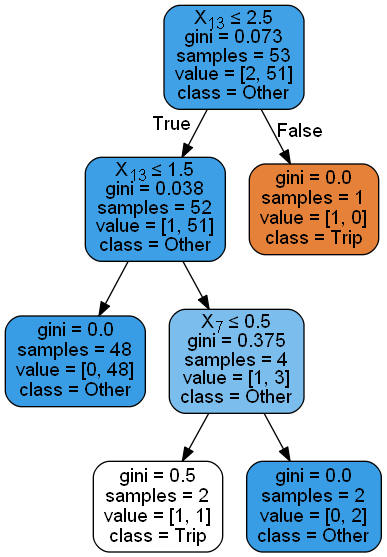

In [517]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

# Random Forest



In [523]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics   

data = pd.read_csv('bagoflist.csv',encoding='UTF8')
data

x = data[['animation',	'baby',	'beauty',	'book',	'broadcast',	'car',	'computer',	'delicious',	'english',	'game',	'movie',	'sports',	'star',	'trip']]
y = data['r_trip']
 
# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

rf = RandomForestClassifier(n_estimators=25)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

125
54
125
54
정확도 : 0.9629629629629629


# 이후 계획

디시젼트리 / 랜덤포레스트 이외로는 주제별 단어 빈도수와 나이브베이즈를 이용해서 프로젝트를 진행해보고 싶다

다음주까지 디시젼트리와 랜덤포레스트 조금 더 다듬고 

나이브베이즈 방법론 or LDA 토픽 모델링 

+ 교수님 조언: 타 블로그 포스팅 크롤링 후 사용해볼 것
+ 더 어려운 모델 (LDA 토픽 모델링 관련 공부해 보고 나이브베이즈와 비교 후 결정)
+ Output이 2개이상일때? (각 주제별 전문성 비교해서 우위에 있는 것 출력할 생각, 네이버 블로그는 주제를 하나밖에 설정하지 못하기 때문,, ex) 상품리뷰와 뷰티가 함께 있으면 뷰티가 우선순위 , 사진과 it가 함께 있을때는 it를 우선적으로 둘 생각)
+ 본문 내용 사용해 보기




# LDA 잠재 디리클레 할당 (Latent Dirichlet Allocation)

* 토픽모델링: 문서 집합에서 토픽 찾아내는 프로세스
* LDA : 단어가 특정 토픽에 존재할 활률과 문서에 특정 토픽 존재할 확률을 결합 확률로 추정해서 토픽 추출

---

- 토픽 개수 사용자가 정하는 것
- 모든 단어를 k개 중 하나의 토픽에 할당
- 모든 문서의 모든 단어에 아래 사항 반복
---

- 문서 내 단어들이 어떤 토픽인지, 첫번째기준은 문서내 단어들이 많이 할당된 토픽으로
- 모든 문서 중 해당 단어 어떤 토픽 많이 할당 되었는지


In [2]:
data = pd.read_csv("plusotherblog.csv", error_bad_lines=False,encoding='CP949')
text = data[['id']+['title']+['contents']]
text.head()

,id,title,contents
0,aquatic_moon,년 월 월 공모전 추천 경기도 코로나 극복 위한 영상 콘텐츠 공모전,안녕하세요 혠입니다 월 일 월요일 경기뉴스포털에 코로나 극복 위한 영상 콘텐...
1,aquatic_moon,특이한 별 꽃 구름 이모티콘 모음 귀여운 표정 특수문자도 있어요,안녕하세요 혠입니다여러분은 평소 어떤 특수문자를 많이 사용하시나요 저는 요즘 구름...
2,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,귀여운 표정 이모티콘 모음 안녕하세요 혠입니다 벌써 귀여운 표정 이모티콘 모음 ...
3,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,표정 이모티콘 안뇽 혠이에요 두 번째 표정 이모티콘 포스팅으로 돌아왔어요제가 볼 ...
4,aquatic_moon,아이폰 화면 녹화 소리 안 들릴 때 마이크 녹음 방법,안녕하세요 혠이에요 먼저 해당 포스팅에서 말하는 화면 녹화는 아이폰에 기본적...


In [ ]:
text['guel'] = text.apply(lambda row: (okt.nouns(row['title']*3 +row['contents'])), axis=1)
text.head()

text.to_csv("plusotherblog_guel.csv", header = True, index=False, encoding='CP949')

--------

In [4]:
data = pd.read_csv("plusotherblog_guel.csv", error_bad_lines=False,encoding='CP949')
text = data[['guel']]

text.head()

,guel
0,"['년', '월', '월', '공모전', '추천', '경기도', '코로나', '극복..."
1,"['별', '꽃', '구름', '이모티콘', '모음', '표정', '특수문자', '..."
2,"['표정', '이모티콘', '특수문자', '이모지', '모음', '표정', '이모티..."
3,"['표정', '이모티콘', '특수문자', '이모지', '모음', '표정', '이모티..."
4,"['아이폰', '화면', '녹화', '소리', '안', '때', '마이크', '녹음..."


In [5]:
text = text.replace('\'','',regex=True)
text = text.replace('\[','',regex=True)
text = text.replace(',','',regex=True)
text = text.replace('\]','',regex=True)
text['guel'].str.strip()
text.head()

,guel
0,년 월 월 공모전 추천 경기도 코로나 극복 위 영상 콘텐츠 공모전 년 월 월 공모전...
1,별 꽃 구름 이모티콘 모음 표정 특수문자 별 꽃 구름 이모티콘 모음 표정 특수문자 ...
2,표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티...
3,표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티...
4,아이폰 화면 녹화 소리 안 때 마이크 녹음 방법 아이폰 화면 녹화 소리 안 때 마이...


In [6]:
text['guel'] = text.apply(lambda row: (row['guel']), axis=1)
text['guel'].head()

0    년 월 월 공모전 추천 경기도 코로나 극복 위 영상 콘텐츠 공모전 년 월 월 공모전...
1    별 꽃 구름 이모티콘 모음 표정 특수문자 별 꽃 구름 이모티콘 모음 표정 특수문자 ...
2    표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티...
3    표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티...
4    아이폰 화면 녹화 소리 안 때 마이크 녹음 방법 아이폰 화면 녹화 소리 안 때 마이...
Name: guel, dtype: object

In [7]:
import nltk

text['guel']= text.apply(lambda row: nltk.word_tokenize (row['guel']), axis=1)
text.head()

,guel
0,"[년, 월, 월, 공모전, 추천, 경기도, 코로나, 극복, 위, 영상, 콘텐츠, 공..."
1,"[별, 꽃, 구름, 이모티콘, 모음, 표정, 특수문자, 별, 꽃, 구름, 이모티콘,..."
2,"[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,..."
3,"[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,..."
4,"[아이폰, 화면, 녹화, 소리, 안, 때, 마이크, 녹음, 방법, 아이폰, 화면, ..."


In [8]:
tokenized_doc = text['guel'].apply(lambda x : [word for word in x if len(word) > 1])
tokenized_doc[:5]

0    [공모전, 추천, 경기도, 코로나, 극복, 영상, 콘텐츠, 공모전, 공모전, 추천,...
1    [구름, 이모티콘, 모음, 표정, 특수문자, 구름, 이모티콘, 모음, 표정, 특수문...
2    [표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...
3    [표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...
4    [아이폰, 화면, 녹화, 소리, 마이크, 녹음, 방법, 아이폰, 화면, 녹화, 소리...
Name: guel, dtype: object

In [24]:
from nltk.corpus import stopwords

temp=[]

with open('./stop_words.txt', 'r',encoding='utf-8') as stop:
    lines = stop.readlines()
    for line in lines:
        line=re.sub('\n','',line,0).strip()
        temp.append(line)

stop_words=' '.join(map(str, temp))
stop_words=stop_words.split(' ')

text['stopwords']=text['guel'].apply(lambda x: [word for word in x if word not in stop_words])
text.head()

,guel,stopwords
0,"[년, 월, 월, 공모전, 추천, 경기도, 코로나, 극복, 위, 영상, 콘텐츠, 공...","[년, 월, 월, 공모전, 경기도, 코로나, 극복, 위, 영상, 콘텐츠, 공모전, ..."
1,"[별, 꽃, 구름, 이모티콘, 모음, 표정, 특수문자, 별, 꽃, 구름, 이모티콘,...","[별, 꽃, 구름, 이모티콘, 모음, 표정, 특수문자, 별, 꽃, 구름, 이모티콘,..."
2,"[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...","[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,..."
3,"[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...","[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,..."
4,"[아이폰, 화면, 녹화, 소리, 안, 때, 마이크, 녹음, 방법, 아이폰, 화면, ...","[아이폰, 화면, 녹화, 소리, 안, 때, 마이크, 녹음, 아이폰, 화면, 녹화, ..."


In [25]:
tokenized_doc = text['stopwords'].apply(lambda x : [word for word in x if len(word) > 1])
tokenized_doc[:5]

0    [공모전, 경기도, 코로나, 극복, 영상, 콘텐츠, 공모전, 공모전, 경기도, 코로...
1    [구름, 이모티콘, 모음, 표정, 특수문자, 구름, 이모티콘, 모음, 표정, 특수문...
2    [표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...
3    [표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...
4    [아이폰, 화면, 녹화, 소리, 마이크, 녹음, 아이폰, 화면, 녹화, 소리, 마이...
Name: stopwords, dtype: object

In [26]:
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

detokenized_doc[:5]

['공모전 경기도 코로나 극복 영상 콘텐츠 공모전 공모전 경기도 코로나 극복 영상 콘텐츠 공모전 공모전 경기도 코로나 극복 영상 콘텐츠 공모전 혠입니 월요일 뉴스 포털 코로나 극복 영상 콘텐츠 공모전 위기탈출 넘버원 경기도 소개 카드 뉴스 발행 도민 국민 참여 공모전 관심 참여 코로나 확산 공포 시점 코로나 바이러스 극복',
 '구름 이모티콘 모음 표정 특수문자 구름 이모티콘 모음 표정 특수문자 구름 이모티콘 모음 표정 특수문자 평소 특수문자 구름 특수문자 스마트폰 기본 내장 구름 아래 구름 이모티콘 구름 이모티콘 글씨체 어플 사진 크기 인스타 아이폰 인스타 거의 수준 구름 특수문자 특수문자 이모티콘 마찬가지 휴대폰 내장 이모지 흑백 감성 이모티콘 컴퓨터 그린 심플 구름 표정 이모티콘 자로 구름 구름 표정 이모티콘 카톡 인스타 구름 이모티콘 이모티콘 갑자기 분위기 문자 개성 이모티콘 긍정 효과 아래 표정 표정 표정 취향 구름 이모티콘 포함 특수문자 이모티콘 플랫폼 기기 종류 수도',
 '표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 모음 혠입니 벌써 표정 이모티콘 모음 등장 수도 이해 표정 이모티콘 복사 쓰시 아이폰 이모티콘 텍스트 대치 설정 갤럭시 텍대 기능 텍대 설정 고고 플랫폼 기기 종류 이모티콘 아래 링크 표정 이모티콘',
 '표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 표정 이모티콘 복사 아이폰 텍스트 대치 설정 표정 이모티콘 에어팟 토끼 졸귀 이모지 제일 드나 이불 특수문자 이모티콘 자체 표정 이모티콘 아래 링크',
 '아이폰 화면 녹화 소리 마이크 녹음 아이폰 화면 녹화 소리 마이크 녹음 아이폰 화면 녹화 소리 마이크 녹음 먼저 해당 화면 녹화 아이폰 기본 녹화 기능 어플 아이폰 화면 녹화 기능 소리 포함 오직 화면 녹화 무음 모드 아이폰 화면 녹화 소리 녹음 마이크 녹음 저작권 어플 넷플릭스 화면

In [27]:
#역토큰화

detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
text['stopwords'] = detokenized_doc

text.head()

,guel,stopwords
0,"[년, 월, 월, 공모전, 추천, 경기도, 코로나, 극복, 위, 영상, 콘텐츠, 공...",공모전 경기도 코로나 극복 영상 콘텐츠 공모전 공모전 경기도 코로나 극복 영상 콘텐...
1,"[별, 꽃, 구름, 이모티콘, 모음, 표정, 특수문자, 별, 꽃, 구름, 이모티콘,...",구름 이모티콘 모음 표정 특수문자 구름 이모티콘 모음 표정 특수문자 구름 이모티콘 ...
2,"[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...",표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티...
3,"[표정, 이모티콘, 특수문자, 이모지, 모음, 표정, 이모티콘, 특수문자, 이모지,...",표정 이모티콘 특수문자 이모지 모음 표정 이모티콘 특수문자 이모지 모음 표정 이모티...
4,"[아이폰, 화면, 녹화, 소리, 안, 때, 마이크, 녹음, 방법, 아이폰, 화면, ...",아이폰 화면 녹화 소리 마이크 녹음 아이폰 화면 녹화 소리 마이크 녹음 아이폰 화면...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorize = CountVectorizer(min_df=2)
X = vectorize.fit_transform(text['stopwords'])
print('(sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

array = pd.DataFrame(X.toarray())
array

(sentence 4021, feature 32822)


,0,1,2,3,4,5,6,7,8,9,...,32812,32813,32814,32815,32816,32817,32818,32819,32820,32821
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
vectorizer = TfidfVectorizer(stop_words=None, max_features=1400)
Y = vectorizer.fit_transform(text['stopwords'])

Y.shape
array1 = pd.DataFrame(Y.toarray())
array1

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.066635,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.149033,...,0.000000,0.0,0.0,0.0,0.0,0.140791,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4018,0.0,0.0,0.0,0.0,0.03299,0.0,0.0,0.0,0.0,0.000000,...,0.023993,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4019,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [30]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', random_state=777, max_iter=1)
lda_top = lda_model.fit_transform(Y)
print(lda_model.components_)
print(lda_model.components_.shape)

[[ 0.07367398  0.13335832  0.07456982 ...  0.19621783  0.07233522
   0.07111476]
 [ 0.0773803   0.07909635  0.07227121 ...  0.0933387   0.09183771
   0.07761155]
 [ 0.07997273  0.07009372  0.07937413 ...  0.08150175  0.06797212
   0.07075156]
 ...
 [ 0.0727847   0.10088315  0.07479548 ...  0.07256836  0.07589441
   0.07009441]
 [ 0.07572535  0.0829938   0.08225844 ...  0.06876195  0.07329401
   0.08794775]
 [ 0.07816747 17.08849087  0.3085743  ...  1.11935683  0.44886881
   1.98376387]]
(20, 1400)


In [31]:
terms = vectorizer.get_feature_names() 
terms

['가가',
 '가게',
 '가구',
 '가기',
 '가능성',
 '가루',
 '가면',
 '가방',
 '가사',
 '가성',
 '가슴',
 '가야',
 '가운데',
 '가을',
 '가입',
 '가정',
 '가족',
 '가죽',
 '가치',
 '각도',
 '각종',
 '각질',
 '간다',
 '간식',
 '간장',
 '갈비',
 '감독',
 '감동',
 '감사',
 '감상',
 '감성',
 '감소',
 '감자',
 '감정',
 '갑자기',
 '강남',
 '강릉',
 '강아지',
 '강의',
 '강추',
 '강화',
 '개발',
 '개봉',
 '개선',
 '개월',
 '갤럭시',
 '거기',
 '거나',
 '거래',
 '거리',
 '거의',
 '거치',
 '거품',
 '걱정',
 '건강',
 '건물',
 '건성',
 '건조',
 '걸그룹',
 '검사',
 '검색',
 '게다가',
 '게시',
 '게임',
 '겨울',
 '결과',
 '결론',
 '결말',
 '결정',
 '결제',
 '결혼',
 '경기',
 '경매',
 '경쟁',
 '경제',
 '경찰',
 '경험',
 '계란',
 '계산',
 '계약',
 '계열',
 '계절',
 '계좌',
 '계획',
 '고객',
 '고급',
 '고기',
 '고려',
 '고민',
 '고생',
 '고양이',
 '고요',
 '고정',
 '고추',
 '고해',
 '골드',
 '골목',
 '공간',
 '공감',
 '공격',
 '공급',
 '공기',
 '공략',
 '공부',
 '공식',
 '공연',
 '공원',
 '공유',
 '공지',
 '공포',
 '공항',
 '과거',
 '과연',
 '과일',
 '과정',
 '관객',
 '관계',
 '관람',
 '관리',
 '관심',
 '광고',
 '광장',
 '광채',
 '광택',
 '교육',
 '교체',
 '교환',
 '구경',
 '구독',
 '구분',
 '구성',
 '구이',
 '구입',
 '구조',
 '구체',
 '국가',
 '국내',
 '국물',
 '국민',
 '굳이',
 '규모',
 '그것'

In [32]:
df = []
def get_topics(components, feature_names, n=10): #토픽별 빈도수 추출하는 함수
    for idx, topic in enumerate(components):
        df.append([(feature_names[i]) for i in topic.argsort()[:-n -1:-1]])

get_topics(lda_model.components_, terms)
df = pd.DataFrame(df)
df = df.T

df.columns = ['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8'
              ,'topic9','topic10','topic11','topic12','topic13','topic14','topic15'
             , 'topic16','topic17','topic18','topic19','topic20']
df

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic20
0,컬러,고양이,스피커,신곡,영화,벤츠,리조트,설정,디자인,펀드,필름,컬러,숟가락,플레이,김밥,투자,영상,노래,노트북,맛집
1,원데이,아이폰,오디오,가사,운동,인스타,칼국수,소득,모델,적금,스티커,피부,아버지,게임,만들기,주식,대출,치킨,바디,카페
2,팔레트,모래,모델,사랑,아이,호텔,강릉,떡볶이,무선,통장,부착,메이크업,하빕,유저,참기름,투자자,편집,크림,벤츠,주문
3,섀도우,애플,차량,노래,시즌,스마트폰,광장,부산,기능,계좌,아이폰,렌즈,드라마,레벨,숟가락,소득,염색,치즈,미션,메뉴
4,피부,갤럭시,표정,사진,강아지,상품,김밥,마우스,충전,자산,제거,발색,하트,스킬,어플,주식시장,스피커,블루투스,패드,고기
5,선크림,카메라,아이폰,대출,경기,발견,대구,파스타,이어폰,부산,표정,핑크,돼지,공략,캐릭터,주택,프로그램,튀김,교체,소스
6,메이크업,스마트폰,인치,음악,작품,인스타그램,여행,쓰기,배터리,은행,영어,브라운,제주,모바일,스킬,금리,오디오,벤츠,카페,식당
7,블러셔,유튜브,코로나,단어,사랑,컴퓨터,백화점,만들기,버튼,미용실,종이,틴트,브랜드,캐릭터,공격,대출,주차,새우,팩트,양념
8,그레이,사진,시합,연습,드라마,소개,사진,하트,노트북,이벤트,먼지,레드,삼겹살,전투,프리,수익률,금리,보험,체크,먹기
9,핑크,자동,음질,반려견,여행,차량,시장,금액,가방,금리,케이스,크림,표정,재난,강릉,적금,동영상,대구,구입,음식


In [33]:
tokenized_doc[:5]

from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1])

[(23, 1), (24, 1), (25, 1), (26, 1), (27, 13), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 3), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 14), (48, 3), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 8), (56, 1), (57, 1), (58, 8), (59, 1), (60, 1), (61, 1), (62, 1)]


In [205]:
import gensim
NUM_TOPICS = 22 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(7, '0.019*"아이패드" + 0.018*"중고차" + 0.016*"관리" + 0.015*"홈페이지"')
(11, '0.028*"영화" + 0.009*"작품" + 0.006*"사랑" + 0.005*"드라마"')
(13, '0.011*"재료" + 0.010*"요리" + 0.010*"레시피" + 0.010*"고기"')
(18, '0.016*"노트북" + 0.014*"작업" + 0.014*"모델" + 0.014*"인치"')
(10, '0.020*"게임" + 0.016*"이벤트" + 0.009*"플레이" + 0.008*"모바일"')
(3, '0.033*"경기" + 0.028*"시즌" + 0.024*"선수" + 0.017*"리그"')
(2, '0.017*"차량" + 0.010*"디자인" + 0.010*"공간" + 0.009*"모델"')
(5, '0.018*"선풍기" + 0.015*"무선" + 0.014*"샤오미" + 0.010*"윈드"')
(1, '0.042*"서버" + 0.039*"플레이" + 0.036*"한국" + 0.034*"블레이드"')
(20, '0.090*"청소" + 0.054*"먼지" + 0.036*"청소기" + 0.029*"코드"')
(6, '0.017*"맛집" + 0.017*"카페" + 0.012*"주문" + 0.012*"사진"')
(17, '0.053*"컬러" + 0.015*"핑크" + 0.014*"렌즈" + 0.014*"브라운"')
(4, '0.024*"여행" + 0.016*"호텔" + 0.008*"노래" + 0.008*"사랑"')
(15, '0.025*"로지텍" + 0.020*"마우스" + 0.018*"보드" + 0.014*"화면"')
(19, '0.016*"앨범" + 0.015*"활동" + 0.014*"차트" + 0.012*"발매"')
(12, '0.014*"투자" + 0.013*"가입" + 0.011*"적금" + 0.011*"슈나이더"')
(16, '0.056*"맥북프로" + 0.011*"마블" + 0.008*"코로나" + 0.008*"고

In [207]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [206]:
#내재적 평가: 결과 사람이 판단하기에 적합?
#Coherence (내재적 평가) - 토픽 일관성

from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_doc, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
print('Perplexity: ', ldamodel.log_perplexity(corpus))

Coherence Score:  0.678503334835518
Perplexity:  -9.158046001669545


In [210]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i == 5:
        break
    print(i,'번째 문서 주제 비율 : ', topic_list)

0 번째 문서 주제 비율 :  [(0, 0.21682596), (10, 0.19866411), (11, 0.33107826), (12, 0.23704773)]
1 번째 문서 주제 비율 :  [(1, 0.30167007), (5, 0.1326161), (10, 0.46130142), (15, 0.027854554), (18, 0.067565694)]
2 번째 문서 주제 비율 :  [(1, 0.43319637), (5, 0.20172244), (10, 0.28666684), (11, 0.061962627)]
3 번째 문서 주제 비율 :  [(1, 0.48323044), (5, 0.11956523), (10, 0.3756009)]
4 번째 문서 주제 비율 :  [(5, 0.28698605), (7, 0.020125248), (15, 0.68481195)]


In [211]:
def doc_topic(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key = lambda x: (x[1]), reverse = True)
        
        for j,(topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num),round(prop_topic,4), topic_list]), ignore_index=True)
                
            else:
                break
    return(topic_table)

In [212]:
topictable =  doc_topic(ldamodel,corpus)
topictable = topictable.reset_index()

topictable.columns = ['index', 'topic','most common','every topic']

In [219]:
# topic table과 blogger 정보 table 연결

df1= topictable[['index']]
df2= data[['id']+['title']]
df3=topictable[['topic']+['most common']+['every topic']]
df4= pd.concat([df1, df2, df3], axis=1)

df4

,index,id,title,topic,most common,every topic
0,0,aquatic_moon,년 월 월 공모전 추천 경기도 코로나 극복 위한 영상 콘텐츠 공모전,11.0,0.3311,"[(0, 0.2167261), (10, 0.19866632), (11, 0.3310..."
1,1,aquatic_moon,특이한 별 꽃 구름 이모티콘 모음 귀여운 표정 특수문자도 있어요,10.0,0.4614,"[(1, 0.30166867), (5, 0.1325698), (10, 0.46136..."
2,2,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,1.0,0.4332,"[(1, 0.43319768), (5, 0.20172238), (10, 0.2866..."
3,3,aquatic_moon,귀여운 표정 이모티콘 특수문자 이모지 모음,1.0,0.4832,"[(1, 0.48323083), (5, 0.119492084), (10, 0.375..."
4,4,aquatic_moon,아이폰 화면 녹화 소리 안 들릴 때 마이크 녹음 방법,15.0,0.6848,"[(5, 0.286986), (7, 0.020128652), (15, 0.68480..."
...,...,...,...,...,...,...
4016,4016,lucky_box7,재택근무와 온라인 강의를 위한 인강용 노트북을 알아보고 있다면 로,18.0,0.9972,"[(18, 0.9972329)]"
4017,4017,lucky_box7,블레이드 한국 서버 도장깨기 처참히 무너졌던 사건,1.0,0.9644,"[(1, 0.96442837), (3, 0.018325068), (15, 0.013..."
4018,4018,lucky_box7,플레이스테이션 스펙과 공개된 듀얼센스,15.0,0.9673,"[(15, 0.96725595), (18, 0.02949648)]"
4019,4019,lucky_box7,홈페이지제작 걱정없이 진행하기 위한 준비는,7.0,0.9749,"[(7, 0.9748722), (18, 0.021460993)]"


In [215]:
# blogger id만 추출

idset = set()

for index, value in enumerate(df4.id):
     idset.add(value)
print(idset)

{'bakemono1', 'king700203', 'forsea5999', 'neriia', 'acartunning', '77huiya', 'zkskftl', 'bongja814', 'shysung28', 'lbygns12', 'givehyun', 'ldi25', 'mittlivsom', 'crazy828282', 'huck15', 'kschle5841', 'chs3202', 'fixion84', 'feny', 'darkdurki', 'dannyelf', 'moyeu119', 'sardonic77', 'dufwjddlftkd', 'meniereman', 'cay2011', 'juhyun9909', 'sgnam10', 'film1982', 'youridalbit', 'hyovelyvov', 'jina3421', 'madden789', 'gyerimong2', 'beluga11', 'jeunkim', 'tech-plus', 'kyakya1633', 'rladnjstjd55', 'mijinkim80', 'dameebaby', 'hyun68', 'clala70', 'yoonjs3', 'gugu9416', 'aiwositai', 'lucky_box7', 'hjamy131', 'doek11', 'rmsgud2007', 'visavisu', 'soary81', 'z2inny', 'luna926', 'lotusksm', 'nwoongwin', 'luckymasiwoo', '12512512', 'didini', 'aquatic_moon', 'hwre7774', 'cutetnwls', 'moimoi1357', 'lbygns123', 'tnwlsdl702', 'meal8030', 'mal3500', 'clarisecho', 'iamchocolat', 'ohjtolstoy', 'cogram', 'mr_choo', 'dean4001', '897jos', 'ssyj963', 'i_pattern', 'jgjj7116', 'dkfnal2232', 'js2y86', 'bushcherry1'

In [236]:
def get_key(val): 
    for key, value in blog_dict.items(): 
         if val in value: 
            return key
        

In [231]:
#미리 정리해둔 blog 별 대주제와 결과를 비교하기 위함

topic_dict={0.0:"other", 1.0: "game", 2.0:"car", 3.0:"sports", 4.0:"travel", 5.0:"IT", 6.0:"delicious", 7.0:"IT", 8.0:["baby", "pet"], 9.0:"cash", 10.0:"game",
       11.0:["drama", "movie"], 12.0:"cash", 13.0:"cook", 14.0:["beauty","fashion"], 15.0:"IT", 16.0:"other", 17.0:["beauty","fashion"], 18.0:"IT", 19.0:"music",
       20.0:"other", 21.0:["beauty","fashion"]}


blog_dict={"game":["12512512","nemonangoom","doek11","jina3421","puck1001","meniereman","anjffh09"],
           "car": ['ohjunkwon','gmgeo','acartunning','cane_h','cogram',	'steg1011','pagani0101'],
           "animation": ['tjdmsgml8099',	'kschle5841',	'rladnjstjd55',	'sangyup1028',	'bakemono1',	'897jos'],
           "travel":['neweunha',	'dufwjddlftkd',	'tnwlsdl702',	'hyun68',	'coreabis',	'sunae628',	'khjins5918',	'cutetnwls',	'feny'],
           "beauty":['chs3202',	'siehl',	'wlgysnl23',	'yangeunb',	'neriia',	'iamchocolat',	'youridalbit',	'gyerimong2',	'dlcmalsis',	'clarisecho',	'hello_phe',	'dameebaby'],
           "drama":['film1982',	'ddazero',	'imaplus',	'js2y86'],
           "sports":['givehyun',	'mittlivsom',	'zkskftl',	'huck15',	'madden789',	'jgjj7116crazy828282',	'z2inny',	'evenfriend',	'nwoongwin',	'yelin1890',	'dkfnal2232',],
           "pet":['lbygns12',	'choi540',	'dean4001',	'lbygns123',	'sardonic77',	'hyovelyvov'],
           "movie":['luckymasiwoo',	'gomsolvie',	'shysung28',	'rnjsekgml052',	'forsea5999',	'cay2011',	'above_cloud',	'casachampion',	'sgnam10',	'ldi25'],
           "delicious":['fixion84',	'visavisu',	'meal8030',	'dmsgur9122',	'clala70',	'saypumpy',	'darkdurki',	'ssyj963',	'hhhrrr33',	'bongja814',	'dannyelf',	'kyakya1633'],
           "baby":['dnjfgid2000',	'kaen17',	'andyfirstlv',	'taehun0930',	'hjamy131'],
           "cook":['king700203',	'mildek',	'mijinkim80',	'kimhy004',	'beluga11',	'juhyun9909',	'yoonjs3',	'gugu9416',	'77huiya',],
           "music":['mal3500','ksy1327'],
           "fashion":['purplemodern',	'sdbuyer',	'jayuyu',	'bushcherry1',],
           "book":['didini',	'sandhya',	'ohjtolstoy',	'next6156',	'lotusksm',],
           "DIY":['i_pattern',	'iqfull01',	'luna926',	'nalda21',],
           "IT":['winsweet',	'moimoi1357',	'seagreen0314',	'mr_choo',	'moyeu119',	'tech-plus',	'neces2',	'soary81',	'aiwositai',	'lucky_box7',],
           "cash":['sirabon',	'ninohaeram',	'resumet',	'wmftkah',	'jeunkim',	'chang0333',	'rmsgud2007',	'hwre7774',	'stockclinic',]
          }

In [281]:

blog_topic = pd.DataFrame()
grade=0
grade2=0

for blogger in idset:
        df5=df4.loc[df4['id']==blogger,['id','topic']]
        counts=df5['topic'].value_counts().to_dict()
        dic_max=max(counts, key=counts.get)
        
        if str(get_key(blogger)) in  topic_dict.get(dic_max) :
            grade+=1
            check = "True"
            
        else:
            check = "False"
        
        
        if str(get_key(blogger)) in ["DIY","book","animation"]:
            grade2+=1
            
        blog_topic = blog_topic.append(pd.Series([blogger, dic_max, topic_dict.get(dic_max), get_key(blogger), check]), ignore_index=True)
        
        
blog_topic.columns = ['blogger', 'topic_num', 'topic', 'real_topic','check']


print("other 추가 정답률:{} / {}  =============== {}%".format(grade-1,len(idset)-1, (grade-1)/(len(idset)-1)*100))
print("other 제외 정답률:{} / {}  =============== {}%".format(grade-1,len(idset)-grade2-1, (grade-1)/(len(idset)-grade2-1)*100))
blog_topic[0:60]

other 추가 정답률:91 / 132  =============== 68.93939393939394%
other 제외 정답률:91 / 117  =============== 77.77777777777779%


,blogger,topic_num,topic,real_topic,check
0,bakemono1,11.0,"[drama, movie]",animation,False
1,king700203,13.0,cook,cook,True
2,forsea5999,11.0,"[drama, movie]",movie,True
3,neriia,14.0,"[beauty, fashion]",beauty,True
4,acartunning,2.0,car,car,True
5,77huiya,13.0,cook,cook,True
6,zkskftl,3.0,sports,sports,True
7,bongja814,6.0,delicious,delicious,True
8,shysung28,11.0,"[drama, movie]",movie,True
9,lbygns12,8.0,"[baby, pet]",pet,True


In [284]:
#LDA로 결정된 나의 블로그 주제

df5=df4.loc[df4['id']=="aquatic_moon",['id','topic']]

counts=df5['topic'].value_counts().to_dict()
print(counts)

dic_max=max(counts, key=counts.get)
print(dic_max)
print(topic_dict.get(dic_max))

{6.0: 60, 5.0: 17, 10.0: 13, 11.0: 12, 4.0: 12, 13.0: 10, 1.0: 9, 17.0: 7, 19.0: 7, 14.0: 6, 0.0: 6, 21.0: 5, 12.0: 3, 2.0: 2, 18.0: 2, 3.0: 2, 20.0: 2, 9.0: 1, 15.0: 1, 16.0: 1, 8.0: 1}
6.0
delicious
